<a href="https://www.kaggle.com/code/uzairrj/mental-disorder-eda-nb-rf-100?scriptVersionId=162550861" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook delves into patient's symptoms to identify mental disorders, which are health issues affecting emotions, thoughts, or behaviors and can lead to distress in various life areas. Initially, we clean and prepare the data for visualization. Then, we perform exploratory data analysis to understand how different symptoms relate to each other. Lastly, we leverage the <b>decision-making capability of the Random Forest</b> and the <b>probabilistic advantage of the Naive Bayes</b>, blending them through a soft voting classifier to accurately diagnose patients using their symptoms.

<div class="alert alert-block alert-success">
<b>📊🔍 Don't miss out on the insights and tips shared! If you find it helpful, give that Upvote button a little love! ❤️🫶 Feel free to fork and customize too. Let's learn and grow together! 🚀📚 Follow me for more exciting data journeys. Together, we conquer Kaggle! 💪🔥</b>
</div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotly import express as exp
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from IPython.display import Markdown, display

In [2]:
df = pd.read_csv("/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv")

In [3]:
rows, columns = df.shape
print(f"Dataframe has {rows} rows and {columns} columns.")

Dataframe has 120 rows and 19 columns.


In [4]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [6]:
df.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


# Data Preprocessing

In [7]:
df = df.drop(["Patient Number"], axis=1)

In [8]:
df["Sexual Activity"] = df["Sexual Activity"].apply(lambda x: x.replace(" From 10",""))
df["Concentration"] = df["Concentration"].apply(lambda x: x.replace(" From 10",""))
df["Optimisim"] = df["Optimisim"].apply(lambda x: x.replace(" From 10",""))

In [9]:
df["Sexual Activity"] = df["Sexual Activity"].astype(dtype=int)
df["Concentration"] = df["Concentration"].astype(dtype=int)
df["Optimisim"] = df["Optimisim"].astype(dtype=int)

In [10]:
df["Suicidal thoughts"] = df["Suicidal thoughts"].apply(lambda x: x.strip())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    int64 
 15  Concentration        120 non-null    int64 
 16  Optimisi

# EDA

The donut chart presents the distribution of mental health conditions among a patient group. Bipolar Type-1 and Depression each account for 25.8% of the cases, followed closely by Bipolar Type-2 with 23.3%. The chart also includes a segment labeled 'Normal', representing 25% of the group, suggesting that these individuals do not currently exhibit symptoms of the listed mental disorders.

In [12]:
expert_diag_freq = df["Expert Diagnose"].value_counts()

fig = exp.pie(values=expert_diag_freq.values, names= expert_diag_freq.keys(), hole=.3)
fig.show()

### Sadness and Sleep Disorder

The bar graph shows two main issues for patients: how often they feel sad and how often they have trouble sleeping. Sadness is a common problem, with many patients feeling sad most of the time. Sleep problems happen less often, but still, many patients do not sleep well sometimes. Very few patients rarely experience these issues. This suggests that feeling sad a lot might be connected to not sleeping well.

In [13]:
exp.histogram(df, x="Sadness", color="Sleep dissorder", barmode="group")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Sadness and Suicidal Thoughts

This bar graph shows the number of patients who have suicidal thoughts with how often they feel sadness. Patients who usually feel sad also often have suicidal thoughts, while those who seldom feel sad have them less often. Most patients sometimes feel sad and don't have suicidal thoughts. 

In [14]:
exp.histogram(df, x="Sadness", color="Suicidal thoughts", barmode="group")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Sadness and Concentration

The bar graph shows how often patients feel sad and how it affects their ability to concentrate. Each number from 1 to 8 represents a different level of concentration, with 1 being the lowest and 8 the highest. Patients who often feel sad (usually) seem to have varying levels of concentration, but many struggle a lot (level 2,4, and 5). Those who sometimes feel sad are spread out across different levels of concentration. Very few patients can concentrate well (level 8) no matter how often they feel sad. This suggests that sadness can make it hard for patients to focus.

In [15]:
exp.histogram(df, x="Concentration", color="Sadness", barmode="group")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Aggressive Response and Sexual Activity

The bar graph compares patient's levels of sexual activity with whether they have aggressive responses. Patients with levels 6,7 and 8 of sexual activity show more aggression (the red bars) than those with lower or higher levels of sexual activity. It's interesting to see that the highest levels of sexual activity (8 and 9) have the highest counts of aggression.

In [16]:
exp.histogram(df, x="Sexual Activity", color="Aggressive Response", barmode="group")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Overthinking and Exhausted

The bar graph displays counts of patients experiencing exhaustion and their tendency to overthink. A large number of patients who sometimes feel exhausted also tend to overthink. Those who usually feel exhausted also often overthink, but to a slightly lesser extent. Interestingly, patients who seldom feel exhausted are less likely to overthink, suggesting that overthinking may be more connected to  extreme levels exhaustation. Furthermore, the patients who overthinks are most-often exhausted.

In [17]:
exp.histogram(df, x="Exhausted", color="Overthinking", barmode="group")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Classification

### Encoding Labels

Encoding categorical values in machine learning is essential for transforming text-based categories into a numerical format that algorithms can work with, enabling the model to make predictions or classifications based on those inputs.

In [18]:
encodings_objs = {}
df_encoded = pd.DataFrame()
for column in df.columns:
    if df[column].dtype != int:
        encodings_objs[column] = LabelEncoder().fit(df[column])
        df_encoded[column] = encodings_objs[column].transform(df[column])
    else:
        df_encoded[column] = df[column]

### Data Spliting

In [19]:
columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim']
X_train,X_test,Y_train,Y_test = train_test_split(df_encoded[columns], df["Expert Diagnose"], random_state=123, train_size=0.8, shuffle=True, stratify=df["Expert Diagnose"])

### Training

In [20]:
rf = RandomForestClassifier(n_estimators=9,random_state=123,criterion="entropy")

In [21]:
nb = CategoricalNB()

In [22]:
vc = VotingClassifier(estimators = [('rf',rf),('nb',nb)],voting="soft")
vc_c = vc.fit(X_train,Y_train)

### Evaluation

Accuracy: 100.0%


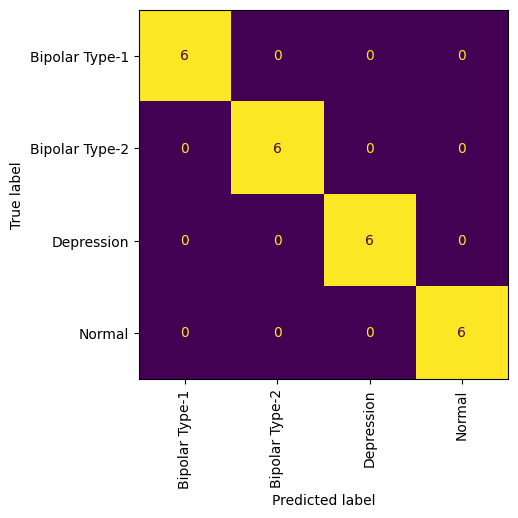

In [23]:
vc_out = vc_c.predict(X_test)
print(f"Accuracy: {accuracy_score(vc_out,Y_test)*100}%")
cm = confusion_matrix(vc_out,Y_test)
disp = ConfusionMatrixDisplay(cm,display_labels=encodings_objs["Expert Diagnose"].classes_)
disp.plot(colorbar=False,xticks_rotation="vertical")
plt.show()

# Predict

In [24]:
display(Markdown("<b>Possible values for prediction:</b>"))
msg = ""
for index,c in enumerate(df.columns[:-1]):
    if df[c].dtype == int:
        msg += f" {index+1}. {c}: *1 to 10*\n"
    else:
        msg += f" {index+1}. {c}: *{', '.join(df[c].unique())}*\n"
display(Markdown(msg))

<b>Possible values for prediction:</b>

 1. Sadness: *Usually, Sometimes, Seldom, Most-Often*
 2. Euphoric: *Seldom, Most-Often, Usually, Sometimes*
 3. Exhausted: *Sometimes, Usually, Seldom, Most-Often*
 4. Sleep dissorder: *Sometimes, Most-Often, Usually, Seldom*
 5. Mood Swing: *YES, NO*
 6. Suicidal thoughts: *YES, NO*
 7. Anorxia: *NO, YES*
 8. Authority Respect: *NO, YES*
 9. Try-Explanation: *YES, NO*
 10. Aggressive Response: *NO, YES*
 11. Ignore & Move-On: *NO, YES*
 12. Nervous Break-down: *YES, NO*
 13. Admit Mistakes: *YES, NO*
 14. Overthinking: *YES, NO*
 15. Sexual Activity: *1 to 10*
 16. Concentration: *1 to 10*
 17. Optimisim: *1 to 10*


In [25]:
patient = {
    'Sadness': 'Sometimes', 
    'Euphoric': 'Usually', 
    'Exhausted': 'Usually', 
    'Sleep dissorder': 'Seldom', 
    'Mood Swing': 'YES',
    'Suicidal thoughts': 'NO', 
    'Anorxia': "NO", 
    'Authority Respect': 'YES', 
    'Try-Explanation': 'NO',
    'Aggressive Response': 'YES', 
    'Ignore & Move-On': 'YES', 
    'Nervous Break-down': 'NO',
    'Admit Mistakes': 'YES', 
    'Overthinking': 'YES', 
    'Sexual Activity': 5, 
    'Concentration':7,
    'Optimisim': 9, 
}

patient_df = pd.DataFrame(patient,index=[0])
patient_df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,Sometimes,Usually,Usually,Seldom,YES,NO,NO,YES,NO,YES,YES,NO,YES,YES,5,7,9


In [26]:
for c in patient_df.columns:
    if patient_df[c].dtype != int:
        patient_df[c] = encodings_objs[c].transform(patient_df[c])

In [27]:
out = vc_c.predict_proba(patient_df)
exp.pie(values=out[0]*100,names=vc_c.classes_,title=f"Prediction confidence for each class. The patient has <b>{vc_c.classes_[np.argmax(out[0])]}</b> mental disorder.")

<div class="alert alert-block alert-info">
<b>Thank you for joining this exploration! 🚀 If you found this kernel insightful 🔍, 
don't hesitate to give it an upvote 👍, follow 🏃 for more exciting content, 
and feel free to fork 🍴 for your own journey of discovery. Happy Kaggling! 😊</b>
</div>